# 8장. 차원축소

## 8.3 PCA

### 8.3.2 주성분

In [1]:
import numpy as np
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [2]:
X_centered = X - X.mean(axis=0) # PCA는 데이터셋의 평균이 0이라고 가정하므로 평균을 0으로 만들어 줌
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [3]:
print('X_centered:', X)
print('c1:', c1, 'c2:', c2)

X_centered: [[-3.29677117  4.26198454  7.69787682]
 [ 5.95972743 11.45784273 12.72625276]
 [ 6.66051523 18.15820401 -9.84713337]
 ...
 [ 6.18364276  1.44095323 -1.71242696]
 [ 5.86076169  1.09185823 12.47091112]
 [-8.16213703  5.61235668  4.51171684]]
c1: [0.56791312 0.15670748 0.80803308] c2: [-0.77712377 -0.2213858   0.5891239 ]


### 8.3.4 사이킷런 사용하기

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 축소
X2D = pca.fit_transform(X)

In [5]:
print("pca:", pca)
print("X2D:", X2D)

pca: PCA(n_components=2)
X2D: [[  2.08374001   9.97769318]
 [ 12.53136592   4.15352368]
 [ -4.26069341 -11.17296129]
 ...
 [ -0.57812196  -2.30906044]
 [ 10.64441015   6.37488622]
 [ -3.04227432  11.58268844]]


In [6]:
print('c1:', pca.components_.T[:,0], 'c2:', pca.components_.T[:,1])

c1: [0.56791312 0.15670748 0.80803308] c2: [-0.77712377 -0.2213858   0.5891239 ]


### 8.3.6 적절한 차원 수 선택하기

In [7]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 ])

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [9]:
X, y = mnist["data"], mnist["target"]
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (70000, 784)
y.shape: (70000,)


In [11]:
print(type(y[0]))
y = y.astype(np.uint8)

<class 'str'>


In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [14]:
print(d)

154


In [15]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

## 8.5 LLE

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [19]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

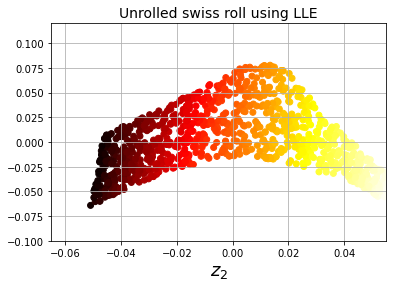

In [22]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.xlabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()